In [1]:
# Mendel Blumberger
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Open file and name it C
c = pd.read_csv("covid.tsv", sep="\t")

In [2]:
c.head(10) # displays 10 columns to give an idea of data

,neighborhood_municipality,individuals_tested,infections,reinfections,deaths,hospitalizations,tests,postives,ag_tests,positive_ag_tests,pcr_tests,positive_pcr_tests,update_date
0,Aleppo,1102,1557,34,15,19,4684,323,2374,96,2312,227,2022-04-04
1,Allegheny Center (Pittsburgh),1011,1181,80,5,14,2898,374,379,47,2520,327,2022-04-04
2,Allegheny West (Pittsburgh),349,392,61,0,5,1217,109,240,17,977,92,2022-04-04
3,Allentown (Pittsburgh),1489,2294,176,2,33,5212,617,1275,83,3934,534,2022-04-04
4,Arlington (Pittsburgh),1075,1736,216,9,29,4382,519,1050,105,3329,413,2022-04-04
5,Arlington Heights (Pittsburgh),148,149,11,3,3,551,42,90,10,461,32,2022-04-04
6,Aspinwall,2098,1965,66,1,11,6905,593,1610,146,5286,446,2022-04-04
7,Avalon,2997,4531,313,12,57,11200,1141,2503,240,8700,900,2022-04-04
8,Baldwin Borough,14391,23656,1482,72,294,50665,6448,13276,1623,37394,4812,2022-04-04
9,Baldwin Township,1353,1886,98,1,13,4191,607,1101,186,3092,418,2022-04-04


14.592760180995475

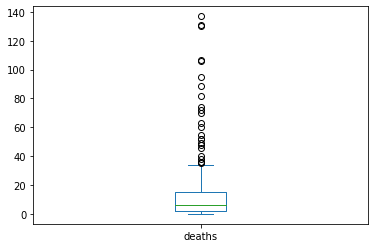

In [3]:
c["deaths"].plot.box() # Box and whisker plot of deaths

c['deaths'].mean() # Mean of deaths

# This graph tells us the average death count per neighborhood was 14.5 with a range of 5 - 20

59.09502262443439

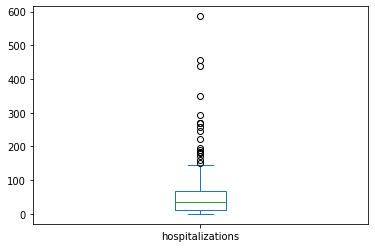

In [4]:
c["hospitalizations"].plot.box() # Box and whisker plot

c['hospitalizations'].mean() # Mean of hospitalizations

# This graph tells us the average hospitalization count per neighborhood was 59 with a range of 20 - 75

5630.3574660633485

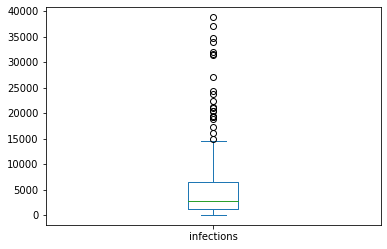

In [5]:
c["infections"].plot.box() # Box and whisker plot

c['infections'].mean() # Mean of infections

# This graph tells us the average infection count per neighborhood was 5630 with a range of 2000 - 7500

In [6]:
# Only displays infections column and ranks them by highest value to lowest
num_infections = c.groupby("neighborhood_municipality").sum()['infections']
num_infections.sort_values(ascending=False)

neighborhood_municipality
Penn Hills                38804
Ross                      37000
Monroeville               34812
Mount Lebanon             34005
Bethel Park               32045
                          ...  
Glenfield                   132
Chateau (Pittsburgh)         85
Haysville                    82
Trafford                     41
Undefined (Pittsburgh)       28
Name: infections, Length: 221, dtype: int64

In [7]:
# Only displays hospitalizations column and ranks them by highest value to lowest
num_hospitalizations = c.groupby("neighborhood_municipality").sum()['hospitalizations']
num_hospitalizations.sort_values(ascending=False)

neighborhood_municipality
Penn Hills                  586
Monroeville                 456
McKeesport                  439
Ross                        351
Baldwin Borough             294
                           ... 
Trafford                      0
Ben Avon Heights              0
South Shore (Pittsburgh)      0
Haysville                     0
Ridgemont (Pittsburgh)        0
Name: hospitalizations, Length: 221, dtype: int64

In [8]:
# Only displays deaths column and ranks them by highest value to lowest
num_deaths = c.groupby("neighborhood_municipality").sum()['deaths']
num_deaths.sort_values(ascending=False)

neighborhood_municipality
Ross                                      137
Monroeville                               131
McCandless                                130
Penn Hills                                107
McKeesport                                106
                                         ... 
Thornburg                                   0
Emsworth                                    0
Esplen (Pittsburgh)                         0
Central Business District (Pittsburgh)      0
Kilbuck                                     0
Name: deaths, Length: 221, dtype: int64

In [9]:
# Compute summary statistics on the numerical columns using pandas 
c.describe()

,individuals_tested,infections,reinfections,deaths,hospitalizations,tests,postives,ag_tests,positive_ag_tests,pcr_tests,positive_pcr_tests
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,4146.461538,5630.357466,386.140271,14.592760,59.095023,15064.190045,1450.257919,3757.805430,332.728507,11296.199095,1113.434389
std,5429.048641,7435.638097,563.579972,23.482813,79.020855,20605.615182,1811.663914,5860.115344,479.340189,15397.776118,1344.440547
min,27.000000,28.000000,0.000000,0.000000,0.000000,84.000000,9.000000,16.000000,0.000000,55.000000,4.000000
25%,944.000000,1181.000000,66.000000,2.000000,13.000000,3063.000000,334.000000,670.000000,59.000000,2312.000000,288.000000
50%,2102.000000,2687.000000,175.000000,6.000000,36.000000,7129.000000,774.000000,1632.000000,146.000000,5561.000000,619.000000
75%,5204.000000,6550.000000,449.000000,15.000000,67.000000,18085.000000,1770.000000,4016.000000,389.000000,13384.000000,1395.000000
max,35883.000000,38804.000000,3139.000000,137.000000,586.000000,129779.000000,10149.000000,33178.000000,2392.000000,97395.000000,7775.000000


In [10]:
df = pd.DataFrame(c) # make a data frame
df["positive_rate"] = df["tests"]/df["postives"] # divide tests by positives

In [11]:
df1 = df[['positive_rate', 'neighborhood_municipality']].sort_values('positive_rate',ascending=True) # sorts positive rate values from lowest to highest

In [12]:
df1.index = pd.RangeIndex(start=1, stop=222, step=1) # This makes the index start at 1 rather than 0

In [13]:
# This displays all the data, the positive rate is in percentage
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df1)

,positive_rate,neighborhood_municipality
1,5.502,Lincoln
2,5.600,Trafford
3,5.890,Wall
4,6.569,Liberty
5,6.608,South Versailles
6,6.679,Crescent
7,6.695,West Elizabeth
8,6.739,East Mckeesport
9,6.743,Mt. Oliver (Pittsburgh)
10,6.816,Elizabeth Township


0. The lowest positives rates per neighborhood are:
1. Lincoln: 5.5%
2. Trafford: 5.6%
3. Wall: 5.89%
4. Liberty: 6.57%
5. South Versailles: 6.61%

0. The highest positive rates per neighorhood are:
1. Squirrel Hill North: 39.66%
2. Undefined: 30.94%
3. Glen Hazel: 26.81%
4. West Oakland: 25.24%
5. North Shore: 24.02%
5. North Oakland: 21.75%

In conclusion, I chose the test positivity rate which divides total tests by positive tests as the deciding factor since the dataset didn’t include population size. A larger amount of infection could be from a larger population so that metric alone can’t be the deciding factor. I found that Lincoln was the best neighborhood due to it being the lowest test positivity rate followed by Trafford and Wall. The respective positivity rates were 5.5%, 5.6% and 5.89%. Lincoln had 724 infections, 2 deaths and 18 hospitalizations which is well below the mean of each metric which is 5630 infections, 14.5 deaths and 59 hospitalizations. 

My personal opinion is Squirrel Hill is the best neighborhood because I grew up there. Although I am obviously biased towards that neighborhood. It has a ton of parks and restaurants, good walkability to stores, it's close to bus stops and Oakland which has a lot of universities.  It was interesting to see that Squirrel Hill has one of the highest positive test rates